# Aula: Cálculo Simples do Volume Molar e Pressão De Saturação a partir de uma Equação De Estado Cúbica
**Objetivo: calcular e desenhar a curva de pressão de saturação...**
* Para uma substância pura (e.g, hexano)
* Usando uma *equação de estado* cúbica (e.g, van der Waals)

## Formulação matemática do problema

* Desenha um gráfico ${P}$ contra ${T}$
* Em que para cada ${T}$,
* Para uma substância pura pré definida 
  * A ${P}$ correspondente é a **pressão** de equilíbrio líquido-vapor dessa substância naquela **temperatura**: ${P}^\mathrm{ sat}({T})$
  
  > **Análise de consistência do problema proposto: análise de graus de liberdade de acordo com a regra das fases de Gibbs**
  >* $\nu^{Gibbs} = {C}-{F}+2$
  >* ...........  $= 1-2+2$
  >* ...........  $= 1$
  >
  >**Conclusão:** Um único grau de liberdade: é possível rerpesentar ${P}^\mathrm{ sat}$ como função de uma variável, no caso, ${T}$, o problema proposto é um problema *bem colocado*.

# Pressão de saturação
  * ${P}^{\mathrm{ sat}}$ é a pressão que resolve ${f}^{\mathrm{ L}}({T},{P}) = {f}^{\mathrm { V}}({T},{P})$.
  * ${f}$ é a fugacidade, que para condição de líquido, é dada por ${f}^\mathrm{ L}({T},{P})=\phi({T},\bar{V}^\mathrm{ L}) \times {P}$
  * e, para condição de vapor, é dada por ${f}^\mathrm{ V}$, analogamente.
  * E $\bar{V}^{\mathrm{ L}}$ e $\bar{V}^\mathrm{ V}$ são o volume molar da substância em condição de líquido e de vapor, respectivamente, dados a partir da análise das raízes da solução da equação estado para ${V}$ em função de ${T}$ e ${P}$:
  * $\bar{V}$ são os volumes que resolvem ${P}\bar{V}^3−({P}{b}+{R}{T})\bar{V}^2+{a}\bar{V}−{a}{b}={0}$
    * Se 3 raízes no intervalo Real $\left( b, \infty \right)$
      * $\bar{V}^\mathrm{ L}$ é a menor e $\bar{V}^\mathrm{ V}$ é a maior delas.
    * Se não
      * Não há solução para ${P}^\mathrm{ sat}$ na temperatura em questão.

# A equação de estado
  * A equação de estado é, em sua forma explícita-em-pressão: ${P}=\frac{{R}{T}}{{\bar{V}}-{b}}-\frac{{a}}{{\bar{V}}^2}$
  
  * Em que$a$ e $b$ são parâmetros dependentes da substância, dados por
    * ${a}=\frac{27}{64}\frac{{{Tc}^2}{{R}^2}}{Pc}$
    * ${b}=\frac{{R}{Tc}}{{8}{Pc}}$
  * E ${R}$ é a constante dos gases, que em unidades SI possui o valor:
    * ${R} = 8.3144598$ $\mathrm{{J} {\mathrm{ mol}^{−1}} {\mathrm{ K}^{−1}}}$
    

# Propriedades conhecidas da substância
* A equação de estado de van der Waals depende de algumas poucas propriedades da substância para fazer sua previsão do comportamento delas em condição de líquido ou vapor
  * Temperatura do ponto crítico ${T_c}$
    * ${T_c}^{hexano}= 507.50$ $\mathrm{K}$
  * Pressão do ponto crítico ${P_c}$
    * ${P_c}^{hexano}= 3010000$ $\mathrm{Pa}$
  

# Implementação em python
* Fazer as rotinas mais básicas e com operação independente
* Testar cada uma delas
* Fazer as rotinas de nível mais alto, chamando as básicas (adaptar as básicas conforme necessário)

# Constantes

In [1]:
R = 8.3144598 #J.mol^−1.K^−1

In [2]:
Tc = 507.50
Pc = 3010000

In [3]:
a = 27/64*((Tc**2)*(R**2)/Pc)
print(a)

2.4954993637433445


In [4]:
b = (R*Tc)/(8*Pc)
print(b)

0.0001752320742732558


# Função básica 1
* EoS em representação ${P}({T},\bar{V})$

In [5]:
def function_P(T,V):
    return R*T/(V-b) - a/(V**2)
print(function_P(298,0.0224))

106510.64263262381


# Função básica 2: Calculadora de volume
* Calcular $\bar{V}$ que resolve ${P}{\bar{V}^3}−({P}{b}+{R}{T}){\bar{V}^2}+{a}\bar{V}−{a}{b}={0}$

** 1 raiz real: método de Newton-Raphson:**

* ${Res}={c_3}\bar{V}^3+{c_2}\bar{V}^2+{c_1}\bar{V}+{c_0}$
* $\frac{\partial {Res}}{\partial {V}}=3{c_3}\bar{V}^2+2{c_2}\bar{V}+{c_1}$
* $\bar{V}_1^{[{k}+1]}=\bar{V}_1^{[{k}]}-\frac{Res}{ {\partial {Res}}/{\partial \bar{V}} }$

** Estimativa inicial: gás ideal:**

* $\bar{V}_1^{[0]} = \frac{{R}{T}}{P}$

**Mais duas raízes: Método de redução de ordem de polinômio:**
* ${c_3}\bar{V}^3+{c_2}\bar{V}^2+{c_1}\bar{V}+c_0=(\bar{V}-\bar{V}_1)({c_4}\bar{V}^2+{c_5}\bar{V}+{c_6})$
* ...............................................$={c_4}\bar{V}^3+({c_5}-{c_4}\bar{V}_1)\bar{V}^2+({c_6}-{c_5}\bar{V}_1)\bar{V}+(-{c_6}\bar{V}_1)$
* ${c_4} = {c_3}$
* ${c_5} = {c_2}+{c_4}\bar{V}_1$
* ${c_6} = {c_1}+{c_5}\bar{V}_1$

**Soluçãos das raizes de uma parábola:**
* $\bar{V}_2 = \frac{-{c_5}+\sqrt{{c_5}^2-4{c_4}{c_6}}}{2{c_4}}$
* $\bar{V}_3 = \frac{-{c_5}-\sqrt{{c_5}^2-4{c_4}{c_6}}}{2{c_4}}$

In [6]:
import numpy as np

In [7]:
def function_V(T,P):
    c3 = P #coefficient for v^3
    c2 = -(P*b+R*T) #coefficient v^2
    c1 = a  #coefficient v^1
    c0 = -a*b  #coefficient v^0
    
    RES=1
    TOL=1e-9
    MAX=1000
    i=0
    V=R*T/P
    V2=0
    V3=0
    while(RES>TOL and i<MAX): #Kernel > Interrupt (console > Ctrl+C)
        V=V-(c3*V**3+c2*V**2+c1*V+c0)/(3*c3*V**2+2*c2*V+c1)
        RES=c3*V**3+c2*V**2+c1*V+c0
        i=i+1

# calc r2 and r3
    
    c4=c3
    c5=c2+c4*V
    c6=c1+c5*V
    
    delta=(c5**2)-(4*c4*c6)
    
    if delta >= 0:
        V2=(-c5 + np.sqrt(delta))/(2*c4)
        V3=(-c5 - np.sqrt(delta))/(2*c4)
    else:
        V2=0
        V3=0

# filter V in (b,infnty)
    if V<b:
        V=0
    if V2<b:
        V2=0
    if V3<b:
        V3=0

    [V,V2,V3]=np.sort([V,V2,V3])
    
    return [V,V2,V3]
    
tryT=150
tryP=100000

[ansv1,ansv2,ansv3]=function_V(tryT,tryP)

print(ansv1,"---",function_P(tryT,ansv1))
print(ansv2,"---",function_P(tryT,ansv2))
print(ansv3,"---",function_P(tryT,ansv3))

0.000194016105431 --- 99999.9997577
0.00219783203804 --- 100000.0
0.0102550736308 --- 100000.0


# Função básica 3
* energia de Gibbs residual
$${\bar{G}^\mathrm{ Res}} = {P}\bar{V}-{R}{T}-\frac{a}{\bar{V}} -{R}{T} \times ln \left (\frac{{P}(\bar{V}-{b})}{{R}{T}} \right )$$

In [8]:
def Residual_G(T,P,V):
    return (P*V)-(R*T)-(a/V)-T*(R*np.log(P*(V-b)/(R*T)))

In [9]:
T=100
P=100
Vs=function_V(T,P)
print(function_V(T,P))
print(Residual_G(T,P,Vs[0]))
print(Residual_G(T,P,Vs[1]))
print(Residual_G(T,P,Vs[2]))

[0.00018686631450534036, 0.0028154881548850706, 8.3116326776048819]
-2978.36956768
4979.68247208
-0.282664348816


In [10]:
def P_sat(T,iguess_P):
    RES=1
    TOL=1e-9
    MAX=1000
    i=0
    P=iguess_P
    while(RES>TOL and i<MAX): #Kernel > Interrupt (console > Ctrl+C)
        [V_L,_,V_V]=function_V(T,P)
        phi_L=np.exp(Residual_G(T,P,V_L)/(R*T))
        phi_V=np.exp(Residual_G(T,P,V_V)/(R*T))
        P=P*(phi_L/phi_V)
        RES=phi_L/phi_V-1.
        i=i+1
#        print("P,V_L,V_V,phi_L,phi_V")
#        print(P,V_L,V_V,phi_L,phi_V,phi_L/phi_V-1.)
    return P

Psat=P_sat(100,100)
print("Psat =                                                                ",Psat)

Psat=P_sat(110,100)
print("Psat =                                                                ",Psat)
Psat=P_sat(120,100)
print("Psat =                                                                ",Psat)
Psat=P_sat(130,100)
print("Psat =                                                                ",Psat)

Psat =                                                                 2.7825108905
Psat =                                                                 13.1143388299
Psat =                                                                 47.6774541222
Psat =                                                                 141.965146964


# Grid, Calc and Plot

In [11]:
T=100
guessP=100
Taxis=np.linspace(100,Tc,1000)
Paxis=np.zeros(1000)
Paxis[0]=P_sat(Taxis[0],guessP)
for i in range(1,999):
    Paxis[i]=P_sat(Taxis[i],Paxis[i-1])
    print(Paxis[i])

2.98116525033
3.19332890255
3.41868918784
3.65794232309
3.91181440028
4.18106150063
4.46647184585
4.76886583664
5.08909722088
5.42805418879
5.78666029488
6.16587546828
6.56669706051
6.99016084945
7.43734207541
7.90935653701
8.40736163386
8.93255748298
9.48618796138
10.0695418768
10.6839540326
11.3308064063
12.0115292527
12.7276022702
13.480555774
14.2719718504
15.1034855343
15.9767860263
16.8936178606
17.8557821222
18.8651376685
19.9236023366
21.0331541818
22.1958327067
23.4137401044
24.689042496
26.0239712037
27.4208239738
28.8819662659
30.4098325042
32.0069273458
33.6758269449
35.4191802441
37.2397102219
39.1402151942
41.1235700796
43.192727677
45.3507199438
47.6006592752
49.9457397849
52.3892385751
54.9345170141
57.5850220039
60.3442872541
63.2159345488
66.2036750053
69.311310339
72.5427340728
75.9019329313
79.3929878882
83.0200755284
86.7874692509
90.699540495
94.7607599595
98.9756988135
103.349029901
107.885528936
112.590075688
117.467655164
122.523358769
127.762385474
133.1900429

/usr/local/lib/python3.5/dist-packages/ipykernel/__main__.py:2: RuntimeWarning: divide by zero encountered in double_scalars
  from ipykernel import kernelapp as app
/usr/local/lib/python3.5/dist-packages/ipykernel/__main__.py:2: RuntimeWarning: invalid value encountered in log
  from ipykernel import kernelapp as app


In [12]:
#compare with Antoine fits:
def Pantoine(T): #http://webbook.nist.gov/cgi/cbook.cgi?ID=C110543&Mask=4
    if T < 177.70:
        return 0
    elif T < 264.93:
        A=3.45604
        B=1044.038
        C=-53.893
        return (10**( A - (B / (T + C)) )   )* 10**5
    elif T < 286.18:
        return 0
    elif T<342.69:
        A=4.00266
        B=1171.53
        C=-48.784
        return (10**( A - (B / (T + C)) )   )* 10**5
    else:
        return 0
    
def Pantoine2(T): #http://ddbonline.ddbst.com/AntoineCalculation/AntoineCalculationCGI.exe
    A=7.01051
    B=1246.33
    C=232.988
    return (10**( A - (B / (T - 273 + C)) )   )* 101325/760.0

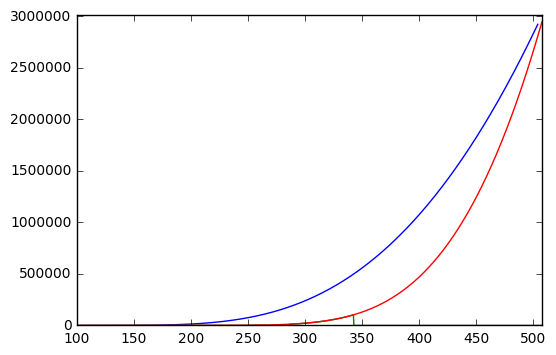

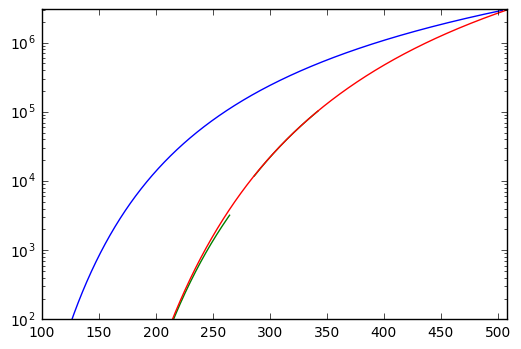

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(1)
plt.plot(Taxis,Paxis)


        
Pantoineaxis = np.zeros(1000)
Pantoineaxis = [ Pantoine(Taxis[i]) for i in range(1000) ]

#print(Pantoineaxis)

plt.plot(Taxis,Pantoineaxis)


Pantoineaxis2 = np.zeros(1000)
Pantoineaxis2 = [ Pantoine2(Taxis[i]) for i in range(1000) ]

#print(Pantoineaxis)

plt.plot(Taxis,Pantoineaxis2)

plt.xlim([100,Tc])
plt.ylim([100,Pc])


plt.figure(2)
plt.semilogy(Taxis,Paxis)


        
Pantoineaxis = np.zeros(1000)
Pantoineaxis = [ Pantoine(Taxis[i]) for i in range(1000) ]

#print(Pantoineaxis)

plt.semilogy(Taxis,Pantoineaxis)


Pantoineaxis2 = np.zeros(1000)
Pantoineaxis2 = [ Pantoine2(Taxis[i]) for i in range(1000) ]

#print(Pantoineaxis)

plt.semilogy(Taxis,Pantoineaxis2)

plt.xlim([100,Tc])
plt.ylim([100,Pc])

plt.show()


# Conclusion

# External References

# Credits